In [ ]:
from stat import filemode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import re
import random
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump, load
from sklearn.cluster import KMeans

In [ ]:
# Label-to-letter dictionary
LABEL_TO_LETTER = {
    0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f',
    6: 'g', 7: 'h', 8: 'i', 9: 'k', 10: 'l', 11: 'm',
    12: 'n', 13: 'o', 14: 'p', 15: 'q', 16: 'r', 17: 's',
    18: 't', 19: 'u', 20: 'v', 21: 'w', 22: 'x', 23: 'y'
}

# Inverse mapping (letter -> label) for quick lookup
LETTER_TO_LABEL = {v: k for k, v in LABEL_TO_LETTER.items()}

# General project path (relative, not absolute)
project_path = os.path.join('train')  # assumes 'train/' folder in current directory

# Import images and labels
images = []
labels = []

for filename in os.listdir(project_path):
    if filename.startswith('.'):
        continue  # Skip hidden files

    filepath = os.path.join(project_path, filename)
    basename = os.path.splitext(filename)[0]
    first_char = basename[0].lower()

    if first_char in LETTER_TO_LABEL:
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
            labels.append(LETTER_TO_LABEL[first_char])

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

# Prepare alphabet list (same order as labels)
ALPHABET_LIST = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
    't', 'u', 'v', 'w', 'x', 'y'
]

# Find one representative sample index for each letter
index = []
for letter in ALPHABET_LIST:
    for idx, label in enumerate(labels):
        if letter == LABEL_TO_LETTER[label]:
            index.append(idx)
            break  # stop after finding the first match

print(index)

labels shape:
(960,)
images shape:
(960, 400, 300)
[9, 27, 19, 0, 233, 8, 246, 11, 255, 237, 89, 18, 21, 13, 3, 176, 29, 118, 242, 28, 241, 4, 243, 1]


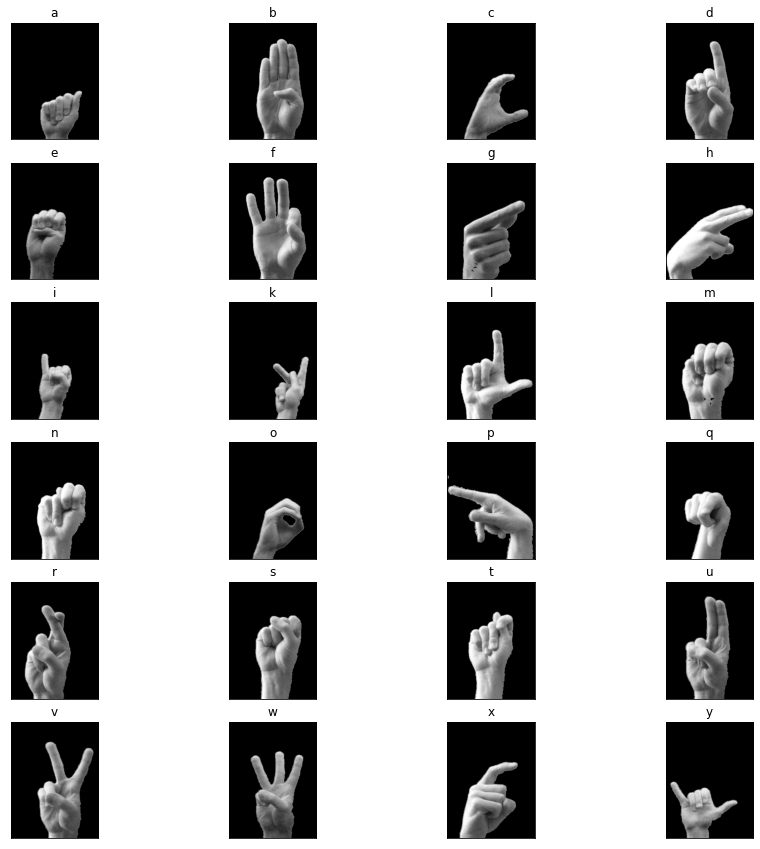

In [ ]:
#display each letter test image
fig, axs = plt.subplots(nrows=6, ncols=4,figsize=(15,15))
random_list = []

axs[0,0].imshow(images[index[0]], cmap='gray') 
axs[0,0].set_title(LABEL_TO_LETTER[labels[index[0]]])

axs[0,1].imshow(images[index[1]], cmap='gray') 
axs[0,1].set_title(LABEL_TO_LETTER[labels[index[1]]])

axs[0,2].imshow(images[index[2]], cmap='gray') 
axs[0,2].set_title(LABEL_TO_LETTER[labels[index[2]]])

axs[0,3].imshow(images[index[3]], cmap='gray') 
axs[0,3].set_title(LABEL_TO_LETTER[labels[index[3]]])

axs[1,0].imshow(images[index[4]], cmap='gray') 
axs[1,0].set_title(LABEL_TO_LETTER[labels[index[4]]])

axs[1,1].imshow(images[index[5]], cmap='gray') 
axs[1,1].set_title(LABEL_TO_LETTER[labels[index[5]]])

axs[1,2].imshow(images[index[6]], cmap='gray') 
axs[1,2].set_title(LABEL_TO_LETTER[labels[index[6]]])

axs[1,3].imshow(images[index[7]], cmap='gray') 
axs[1,3].set_title(LABEL_TO_LETTER[labels[index[7]]])

axs[2,0].imshow(images[index[8]], cmap='gray') 
axs[2,0].set_title(LABEL_TO_LETTER[labels[index[8]]])

axs[2,1].imshow(images[index[9]], cmap='gray') 
axs[2,1].set_title(LABEL_TO_LETTER[labels[index[9]]])

axs[2,2].imshow(images[index[10]], cmap='gray') 
axs[2,2].set_title(LABEL_TO_LETTER[labels[index[10]]])

axs[2,3].imshow(images[index[11]], cmap='gray') 
axs[2,3].set_title(LABEL_TO_LETTER[labels[index[11]]])

axs[3,0].imshow(images[index[12]], cmap='gray') 
axs[3,0].set_title(LABEL_TO_LETTER[labels[index[12]]])

axs[3,1].imshow(images[index[13]], cmap='gray') 
axs[3,1].set_title(LABEL_TO_LETTER[labels[index[13]]])

axs[3,2].imshow(images[index[14]], cmap='gray') 
axs[3,2].set_title(LABEL_TO_LETTER[labels[index[14]]])

axs[3,3].imshow(images[index[15]], cmap='gray') 
axs[3,3].set_title(LABEL_TO_LETTER[labels[index[15]]])

axs[4,0].imshow(images[index[16]], cmap='gray') 
axs[4,0].set_title(LABEL_TO_LETTER[labels[index[16]]])

axs[4,1].imshow(images[index[17]], cmap='gray') 
axs[4,1].set_title(LABEL_TO_LETTER[labels[index[17]]])

axs[4,2].imshow(images[index[18]], cmap='gray') 
axs[4,2].set_title(LABEL_TO_LETTER[labels[index[18]]])

axs[4,3].imshow(images[index[19]], cmap='gray') 
axs[4,3].set_title(LABEL_TO_LETTER[labels[index[19]]])

axs[5,0].imshow(images[index[20]], cmap='gray') 
axs[5,0].set_title(LABEL_TO_LETTER[labels[index[20]]])

axs[5,1].imshow(images[index[21]], cmap='gray') 
axs[5,1].set_title(LABEL_TO_LETTER[labels[index[21]]])

axs[5,2].imshow(images[index[22]], cmap='gray') 
axs[5,2].set_title(LABEL_TO_LETTER[labels[index[22]]])

axs[5,3].imshow(images[index[23]], cmap='gray') 
axs[5,3].set_title(LABEL_TO_LETTER[labels[index[23]]])


plt.setp(axs, xticks=[], yticks=[])

plt.show()

In [78]:
#split up training data into training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(images,labels,train_size=0.8,test_size=0.2, random_state = 1 )#always get the same output

#create SIFT_create instance
sift = cv2.SIFT_create(contrastThreshold = 0.06)

#loop through all of the training data and save all descriptors
for i in range(X_train.shape[0]):
    _, descriptors = sift.detectAndCompute(X_train[i], None)
    if(i == 0):
        all_discriptors = descriptors
        print(all_discriptors.shape)
    else:
        all_discriptors = np.concatenate((all_discriptors,descriptors))

print(all_discriptors.shape)
all_discriptors = all_discriptors.astype('float32')

(84, 128)
(54546, 128)


In [32]:
train_accuracy = []
validation_accuracy = []

In [16]:
#loop through different amount of clusters to see what the training and validation accuracy would be

for clusters in [15,20,25,30,35,40,45,50,55,60,65,70,75,80]:

    print(f'Using {clusters} classes:')
    #cluster all)discriptors with 'clusters' classes
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(all_discriptors)

    #implement Bag of Words and get histogram as feature vector
    histogram_vocabs = []
    for i in range(X_train.shape[0]):
        _, descriptors = sift.detectAndCompute(X_train[i],None)
        vocabs = kmeans.predict(descriptors.astype('float32'))
        hist, _ = np.histogram(vocabs, bins=range(clusters))  # first bin [0, 1), last bin [30,31]
        histogram_vocabs.append(hist)

    X_train_hist = np.array(histogram_vocabs)


    print('Training model')
    #l2 penalty,loss: squared hinge
    #train SVM model
    clf = SVC(kernel='linear').fit(X_train_hist,Y_train)
    
    #predict
    y_pred_train = clf.predict(X_train_hist)

    #complete the same for the validation data
    histogram_vocabs = []
    for i in range(X_val.shape[0]):
        _, descriptors = sift.detectAndCompute(X_val[i],None)
        vocabs = kmeans.predict(descriptors.astype('float32'))
        hist, _ = np.histogram(vocabs, bins=range(clusters))  # first bin [0, 1), last bin [30,31]
        histogram_vocabs.append(hist)
    X_val_hist = np.array(histogram_vocabs)

    y_pred_val = clf.predict(X_val_hist)

    print('Training Accuracy')
    result_train = accuracy_score(Y_train,y_pred_train)
    print(result_train)
    print('Validation Accuracy')
    result = accuracy_score(Y_val,y_pred_val)
    print(result)
    print()
    validation_accuracy.append(result)
    train_accuracy.append(result_train)

Using 15 classes:
Training model
Training Accuracy
0.85546875
Validation Accuracy
0.4583333333333333

Using 20 classes:
Training model
Training Accuracy
0.9674479166666666
Validation Accuracy
0.4635416666666667

Using 25 classes:
Training model
Training Accuracy
0.9895833333333334
Validation Accuracy
0.5989583333333334

Using 30 classes:
Training model
Training Accuracy
0.9973958333333334
Validation Accuracy
0.6197916666666666

Using 35 classes:
Training model
Training Accuracy
1.0
Validation Accuracy
0.5833333333333334

Using 40 classes:
Training model
Training Accuracy
1.0
Validation Accuracy
0.6927083333333334

Using 45 classes:
Training model
Training Accuracy
1.0
Validation Accuracy
0.7135416666666666

Using 50 classes:
Training model
Training Accuracy
1.0
Validation Accuracy
0.7395833333333334

Using 55 classes:
Training model
Training Accuracy
1.0
Validation Accuracy
0.71875

Using 60 classes:
Training model
Training Accuracy
1.0
Validation Accuracy
0.765625

Using 65 classes:
T

In [101]:
#used 50 clusters as it performed best when testing with real time video
#same process as described above

clusters=50
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(all_discriptors)

#saving the kmeans classifier
dump(kmeans,'kmeans_50.joblib')

histogram_vocabs = []
for i in range(X_train.shape[0]):
    _, descriptors = sift.detectAndCompute(X_train[i],None)
    vocabs = kmeans.predict(descriptors.astype('float32'))
    hist, _ = np.histogram(vocabs, bins=range(clusters))  # first bin [0, 1), last bin [30,31]
    if(i==20):
        hist_20 = hist
    if(i==1):
        hist_1 = hist
    histogram_vocabs.append(hist)

X_train_hist = np.array(histogram_vocabs)


print('Training model')
clf = SVC(kernel='linear').fit(X_train_hist,Y_train)

#saving the SVM classifier
dump(clf,'sift_50.joblib')

y_pred_train = clf.predict(X_train_hist)

histogram_vocabs = []
for i in range(X_val.shape[0]):
    _, descriptors = sift.detectAndCompute(X_val[i],None)
    vocabs = kmeans.predict(descriptors.astype('float32'))
    hist, _ = np.histogram(vocabs, bins=range(clusters))  # first bin [0, 1), last bin [30,31]
    histogram_vocabs.append(hist)
X_val_hist = np.array(histogram_vocabs)

y_pred_val = clf.predict(X_val_hist)

print('Training Accuracy')
result_train = accuracy_score(Y_train,y_pred_train)
print(result_train)
print('Validation Accuracy')
result = accuracy_score(Y_val,y_pred_val)
print(result)

Training model
Training Accuracy
1.0
Validation Accuracy
0.7708333333333334


(array([ 4., 18.,  9., 10.,  2.,  3.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

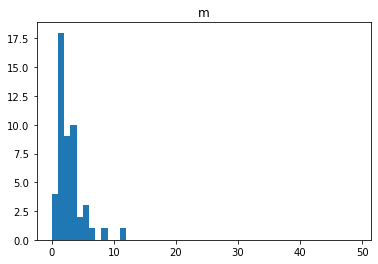

In [ ]:
#show different feature histograms
plt.title(LABEL_TO_LETTER[Y_train[20]])
plt.hist(hist_20, bins=range(50))

(array([ 9., 14.,  9.,  7.,  5.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

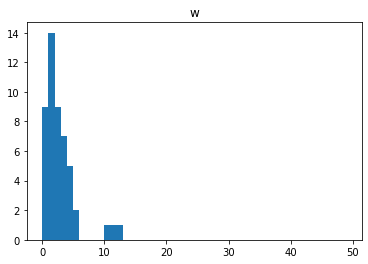

In [ ]:
plt.title(LABEL_TO_LETTER[Y_train[1]])
plt.hist(hist_1, bins=range(50))

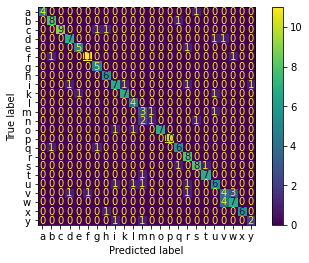

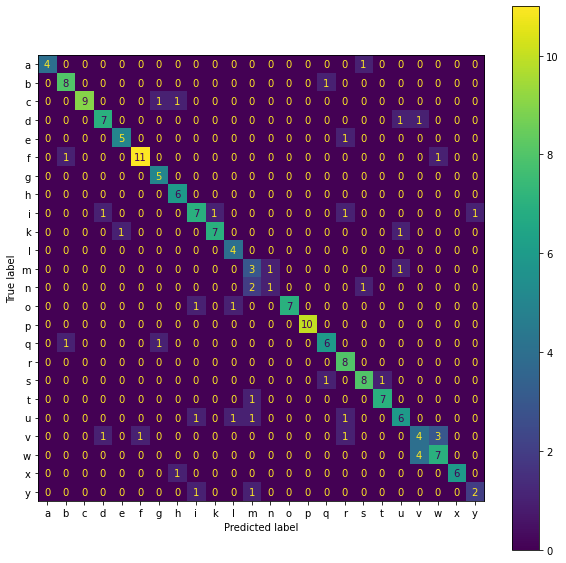

In [ ]:
#compute confusion matrix for validation data
from sklearn.metrics import ConfusionMatrixDisplay

ALPHABET_LIST = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
    't', 'u', 'v', 'w', 'x', 'y'
]

cmp = ConfusionMatrixDisplay.from_estimator(clf,X_val_hist,Y_val,display_labels=ALPHABET_LIST)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)